# simulation results for first prototype at TAU - count photons in SiPM array and estimate time resolution 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle, Ellipse
path = '/Users/erezcohen/Desktop/data/DuSiHodSim/output/csv_files/';

In [2]:
def set_axes_fontsize(ax,fontsize):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

In [3]:
def ComputeNPhotonsArrivingAtWGmarginExit(  version=8.0,
                                        WGname = 'WGfrontSide40_length300',
                                        r_PMT = (20/2) * 2.54, # 2'' PMT
                                        aSiPM = 3, # [mm]
                                        NSiPMs = 30,
                                        xSiPMs = [-10, -5 , 0 , 5 , 10],
                                        ySiPMs = [-15, -10 , -5 , 5 , 10 , 15], 
                                        fdebug=0
                                     ): 

    scenario_name='version_%.1f_EJ204_%s_photons.csv'%(version,WGname)
    sim_results = pd.read_csv(path + scenario_name);
    
    ArrivedAtFrontFacet = sim_results[  (sim_results['ArrivedAtFrontFacet']==1)                                       
                                      & (sim_results['AbsorbedInScintillator']==0)                                     
                                      & (sim_results['HitBackFacet']==0)]
    
    ArrivedAtWaveguideMarginExit = ArrivedAtFrontFacet[(ArrivedAtFrontFacet['ArrivedAtWaveguideMarginExit']==1) 
                                                 & (ArrivedAtFrontFacet['AbsorbedInWaveguide']==0)]

    # in PMT    
    InPMTarea = ArrivedAtWaveguideMarginExit[ (np.square(ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosX) 
                                      + np.square(ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosY)) 
                                        <= np.square(r_PMT) ]

    # in SiPM array
    InSiPMarea = pd.DataFrame();
    for xSiPM in xSiPMs:#{
        for ySiPM in ySiPMs:#{
            InSiPMarea = pd.concat([InSiPMarea , 
                                    ArrivedAtWaveguideMarginExit[   (np.abs((ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosX-xSiPM))< float(aSiPM)/2)                        
                                                            & (np.abs((ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosY-ySiPM))< float(aSiPM)/2)] ])
        #}
    #}

    return [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit]

In [8]:
[InPMT,InSiPM,PhotonsInExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,
                                                                     WGname='WG_side27mm_length200_margin3cm_one_proton');
NPMT = len(InPMT);
NSiPM = len(InSiPM);    

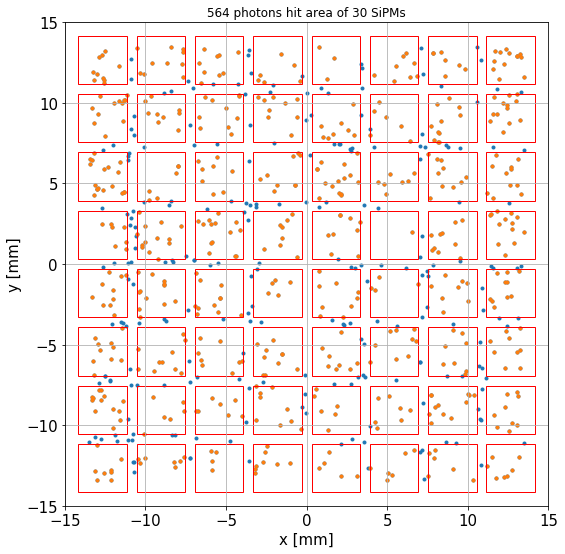

In [30]:
# in SiPM array
InSiPMarea = pd.DataFrame();
# https://www.ketek.net/wp-content/uploads/2016/12/KETEK-PA3325-WB-0808-Datasheet.pdf
Xtot = 25.32
aSiPM = 3; # [mm]
xSiPMs = np.linspace(-Xtot/2,Xtot/2,8)
ySiPMs = xSiPMs

for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        InSiPMarea = pd.concat([InSiPMarea , 
                            PhotonsInExit[ (np.abs((PhotonsInExit.HitWaveguideExitPosX-xSiPM))< float(aSiPM)/2)                        
                                                    & (np.abs((PhotonsInExit.HitWaveguideExitPosY-ySiPM))< float(aSiPM)/2)] ])
        
figure,ax = plt.subplots(figsize=(8,8));
plt.scatter( PhotonsInExit.HitWaveguideExitPosX, PhotonsInExit.HitWaveguideExitPosY , marker='.')
plt.scatter( InSiPMarea.HitWaveguideExitPosX, InSiPMarea.HitWaveguideExitPosY , marker='.')
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        rect = Rectangle((xSiPM-float(aSiPM)/2,
                          ySiPM-float(aSiPM)/2),
                         aSiPM,
                         aSiPM,
                         linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit area of 64 SiPMs'%len(InSiPMarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()
ax.set_xlim(-30/2,30/2);ax.set_ylim(-30/2,30/2);


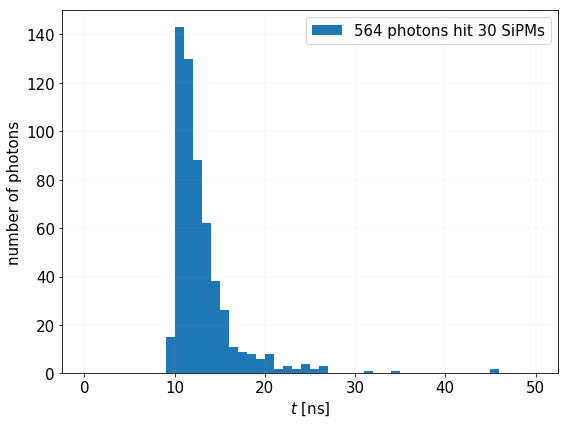

In [36]:
# time distribution of the arriving photons
time_bins=np.linspace(0,50,51)
figure,ax = plt.subplots(figsize=(8,6));
h = plt.hist( InSiPMarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 30 SiPMs'%len(InSiPMarea))
ax.set_xlabel('$t$ [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()

In [39]:
np.cumsum( np.histogram(InSiPMarea.TimeFromStart) )

2390     1.046690e-08
6565     2.086930e-08
15405    3.376420e-08
22232    5.163360e-08
25339    6.424660e-08
25994    7.681850e-08
28452    8.946810e-08
29191    1.032448e-07
1117     1.147446e-07
7272     1.276217e-07
9544     1.382637e-07
12106    1.515524e-07
13765    1.650600e-07
13916    1.768304e-07
14010    1.884725e-07
17253    1.992408e-07
20318    2.114236e-07
24685    2.250940e-07
25385    2.568940e-07
27503    2.699982e-07
28220    2.860894e-07
526      2.982972e-07
848      3.091341e-07
1422     3.207457e-07
3876     3.352530e-07
4613     3.459500e-07
8660     3.588571e-07
9085     3.695563e-07
25301    3.825756e-07
28858    3.937555e-07
             ...     
17598    6.987241e-06
24633    6.999004e-06
24635    7.012185e-06
27379    7.022886e-06
1636     7.035125e-06
7391     7.049626e-06
12674    7.060962e-06
13632    7.074934e-06
14954    7.086343e-06
14995    7.101823e-06
20420    7.114314e-06
21413    7.126039e-06
21682    7.139213e-06
22862    7.149688e-06
26487    7

In [18]:
xSiPMs[2] - xSiPMs[1]

3.8571428571428568